<h1 style="text-align: center; font-size: 50px;">Welcome to Uber Trip Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("UberDataset.csv")

In [5]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
data.shape

(1156, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

### Exploration Summary
> 1. we have a dataframe consisting of 1156 rows and 7 columns.
> 2. our dataset column Purpose have null values.
> 3. we repalce Null or NaNs values with other proper values.
> 4. Change Date Format of column START_DATE, END_DATE.

### Data Preprocessing ...

In [13]:
# Convert valid values to the desired data type.
# Replace invalid or non-convertible values with NaN instead of raising an error
data["START_DATE"]=pd.to_datetime(data["START_DATE"],errors="coerce") 
data["END_DATE"]=pd.to_datetime(data["START_DATE"],errors="coerce")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    421 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [17]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [21]:
data["PURPOSE"].fillna("NOT_DEFINE",inplace=True)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) 

In [23]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT_DEFINE
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
import datetime

# create seperate column "date" and "time" and seperate value in "START_DATE" and "END_DATE"
data["date"]=pd.DatetimeIndex(data["START_DATE"]).date
data["time"]=pd.DatetimeIndex(data["START_DATE"]).hour

In [27]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT_DEFINE,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [31]:
data["day-night"]=pd.cut(x=data["time"],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])

In [33]:
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT_DEFINE,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN,NaN


In [35]:
data.dropna(inplace=True)
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
date          0
time          0
day-night     0
dtype: int64

In [37]:
data.shape

(414, 10)

In [39]:
data.describe()

,START_DATE,END_DATE,MILES,time
count,414,414,414.000000,414.000000
mean,2016-07-01 16:40:05.942029056,2016-07-01 16:40:05.942029056,9.119807,15.241546
min,2016-01-01 21:11:00,2016-01-01 21:11:00,0.500000,1.000000
25%,2016-03-12 11:31:30,2016-03-12 11:31:30,2.725000,12.000000
50%,2016-07-04 19:11:30,2016-07-04 19:11:30,5.700000,16.000000
75%,2016-10-10 23:28:30,2016-10-10 23:28:30,9.900000,18.000000
max,2016-12-12 20:48:00,2016-12-12 20:48:00,174.200000,23.000000
std,NaN,NaN,16.497271,4.277268


In [41]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT_DEFINE,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


### Data Visualization ...

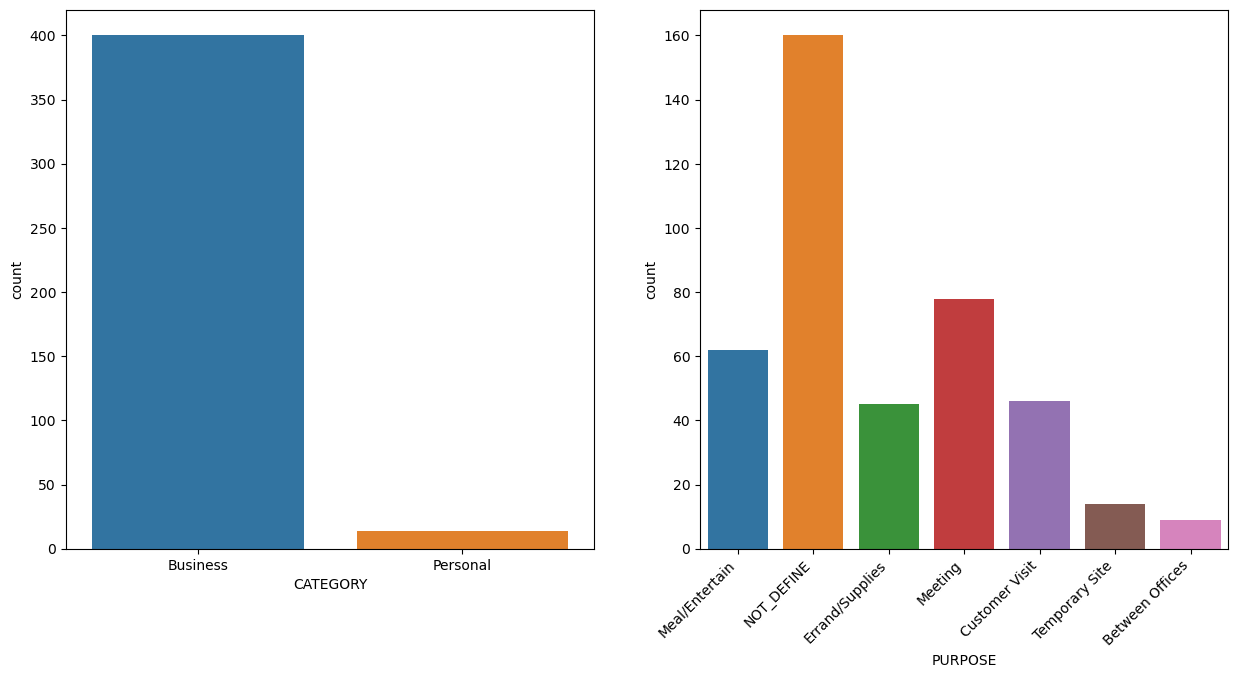

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=data["CATEGORY"],data=data,hue=data["CATEGORY"])

plt.subplot(1,2,2)
sns.countplot(x=data["PURPOSE"],data=data,hue=data["PURPOSE"])
plt.xticks(rotation=45,ha="right")
plt.show()

> 1. Business Categories has book most of ride book
> 2. for a Meeting Purpose uber ride are booked

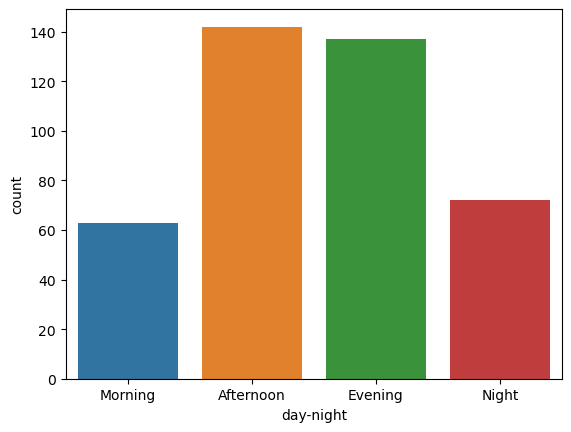

In [45]:
sns.countplot(x=data["day-night"],data=data,hue=data["day-night"])
plt.show()

> 1.In Afternoon Time most of the people are booked uber 

In [47]:
start_rides=data["START"].value_counts().reset_index()
start_rides

,START,count
0,Cary,94
1,Morrisville,38
2,Whitebridge,34
3,Unknown Location,22
4,Durham,17
...,...,...
103,Pontchartrain Beach,1
104,Metairie,1
105,St Thomas,1
106,Arlington Park at Amberly,1


In [49]:
stop_ride=data["STOP"].value_counts().reset_index()
stop_ride

,STOP,count
0,Cary,92
1,Morrisville,40
2,Whitebridge,28
3,Unknown Location,21
4,Durham,19
...,...,...
107,Cedar Hill,1
108,Florence,1
109,Ridgeland,1
110,Jacksonville,1


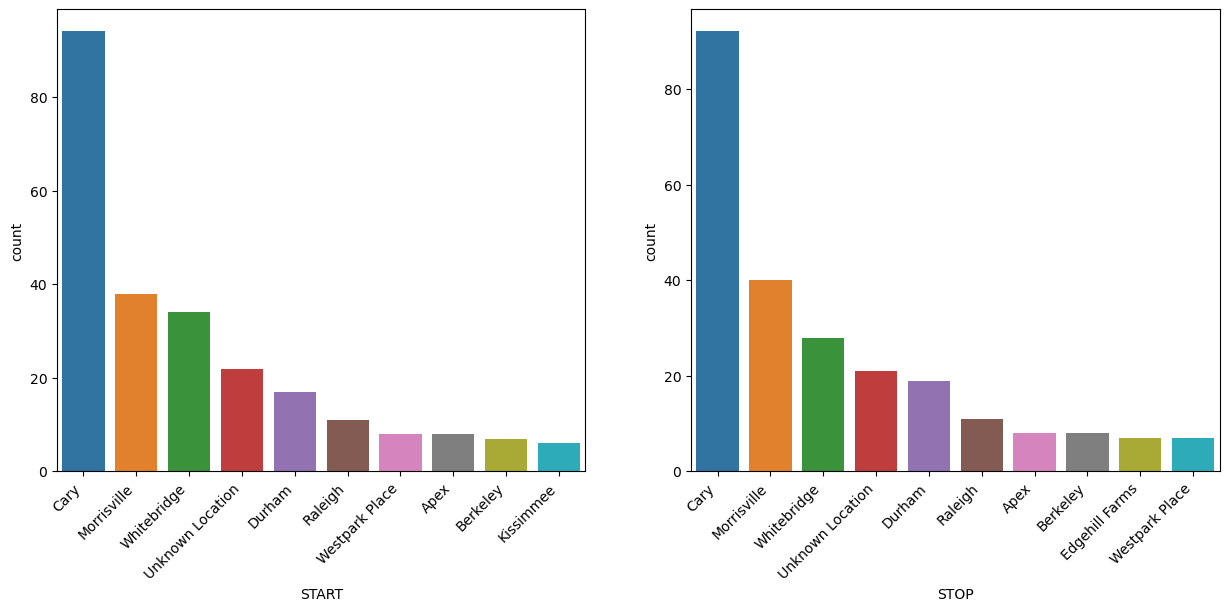

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=start_rides["START"][:10],y=start_rides["count"][:10],data=start_rides[:10],hue=start_rides["START"][:10])
plt.xticks(rotation=45,ha="right")

plt.subplot(1,2,2)
sns.barplot(x=stop_ride["STOP"][:10],y=stop_ride["count"][:10],data=stop_ride[:10],hue=stop_ride["STOP"][:10])
plt.xticks(rotation=45,ha="right")
plt.show()


> 1. Highest Frequency of Start location is  "Cary" followed by "Morrisville"
> 2. Highest Frequency of Stop location is  "Cary" followed by "Morrisville"

In [53]:
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH_OF_THE_RIDE"] = data["START_DATE"].dt.month.map(month_label)

In [55]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT_DEFINE,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [57]:
M_count=data["MONTH_OF_THE_RIDE"].value_counts()
M_count

MONTH_OF_THE_RIDE
Nov      63
Aug      43
Mar      42
June     42
Feb      40
Dec      39
July     35
May      26
April    24
Oct      24
Jan      23
Sep      13
Name: count, dtype: int64

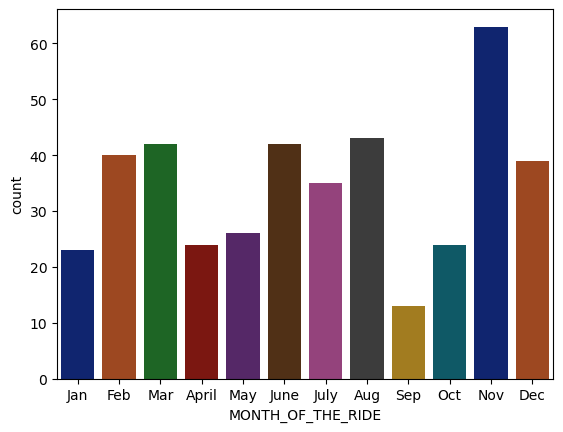

In [59]:
sns.countplot(x=data["MONTH_OF_THE_RIDE"],data=data,palette="dark")
plt.show()

> In the month of September, fewer bookings occur.

In [61]:
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data["DAY_OF_THE_RIDE"]=data["START_DATE"].dt.day.map(day_label)

In [63]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:11:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Tues
1,2016-01-02 01:25:00,2016-01-02 01:25:00,Business,Fort Pierce,Fort Pierce,5.0,NOT_DEFINE,2016-01-02,1.0,Morning,Jan,Wed
2,2016-01-02 20:25:00,2016-01-02 20:25:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Wed
3,2016-01-05 17:31:00,2016-01-05 17:31:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Sat
4,2016-01-06 14:42:00,2016-01-06 14:42:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Sun


In [65]:
D_count=data["DAY_OF_THE_RIDE"].value_counts()
D_count

DAY_OF_THE_RIDE
Tues    42
Fri     32
Thus    32
Sat     31
Sun     31
Wed     30
Name: count, dtype: int64

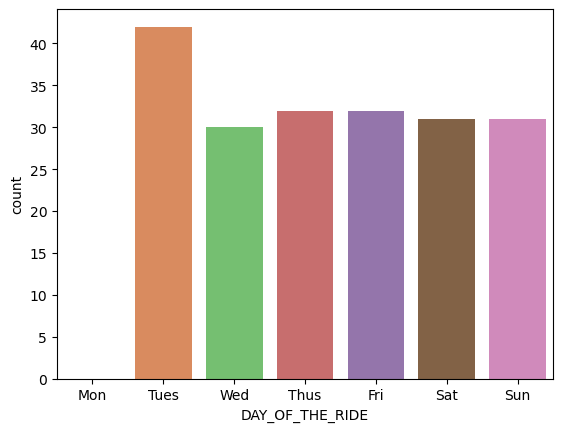

In [77]:
sns.countplot(x=data["DAY_OF_THE_RIDE"],order=["Mon", "Tues", "Wed", "Thus", "Fri", "Sat", "Sun"],palette="muted")
plt.show()

> In day of Tuesday people book most of uber ride.

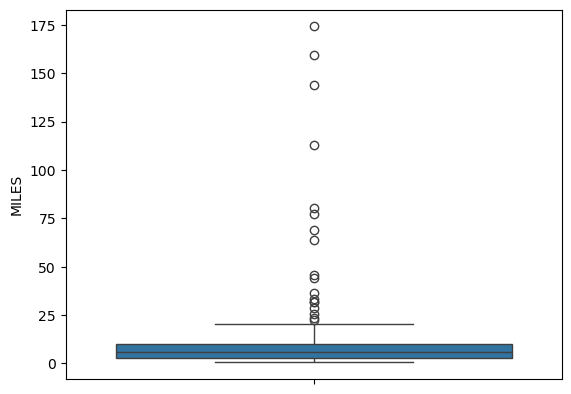

In [81]:
sns.boxplot(data["MILES"])
plt.show()

<Axes: ylabel='MILES'>

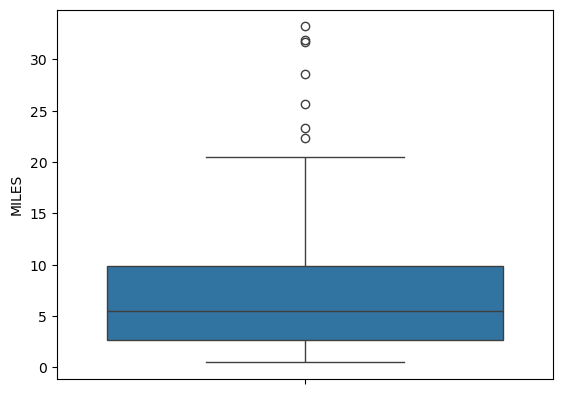

In [87]:
sns.boxplot(data[data["MILES"]<35]["MILES"])

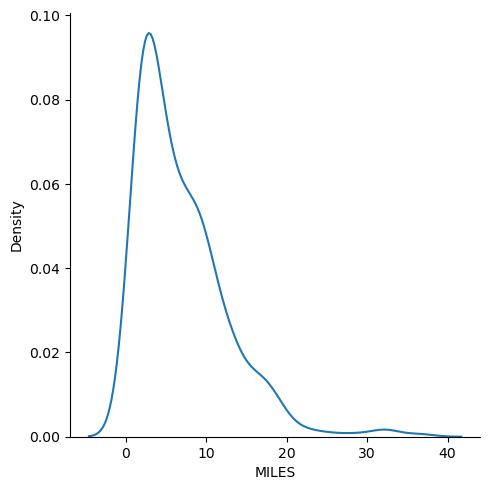

In [158]:
sns.displot(data[data["MILES"]<40]["MILES"],kind="kde")
plt.show()

> Uplot 15 Miles people are booked uber ride.

## Conclusion ......

#### In which category do people book the most Uber rides?
##### ---> Business Categories has book most of ride book.
#### For which purpose do people book Uber rides the most?
##### ---> For a Meeting Purpose most of the Uber ride are booked.
#### At what time do people book cabs the most from Uber?
##### ---> In Afternoon Time most of the people are booked uber.
#### Which is Highest Start and Stop location in Uber Ride ?
##### ---> Highest Frequency of Start location is "Cary" followed by "Morrisville".
##### ---> Highest Frequency of Stop location is "Cary" followed by "Morrisville".
#### In which months do people book Uber rides less frequently?
##### ---> In the month of September, fewer bookings occur.
#### On which days of the week do people book Uber rides the most?
##### ---> In day of Tuesday people book most of uber ride.
#### How many miles do people usually book a cab for through Uber?
##### ---> Uplot 15 Miles people are booked uber ride.